In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


운동을 하지 않는 이유

In [2]:
practice0 = pd.DataFrame({"이름":["홍길동","김길동"], "나이":[100,200]})
# 데이터를 json 형태로 입력

In [3]:
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [4]:
practice = pd.DataFrame({"날짜":[],"운동":[],"양":[]})
practice

,날짜,운동,양


In [5]:
practice.loc[0] = ['19-3-1','달리기', 1.]
# loc = location의 약자. 행인덱스에 한 행을 추가해라.
# 1.0이 아니라 1. 이라고 쳐도 float형태로 입력됨.
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [6]:
practice.loc[1] = ['19-3-2','걷기', 3.]
practice.loc[2] = ['19-3-3','달리기', 1.]
practice.loc[3] = ['19-3-4','계단오르기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,3.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0


In [7]:
practice.loc[4] = ['19-3-5','걷기', 1.5]
practice.loc[5] = ['19-3-6','달리기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,3.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0


In [8]:
practice.to_csv('../data09/practice.csv', encoding='utf-8')
# kaggle/input에서는 write가 안됨.
# to_csv = csv파일로 저장해줄것. 경로와 인코딩방식이 필요

In [10]:
# 파일 불러오기
practice2 = pd.read_csv('../data09/practice.csv', encoding='utf-8')
practice2

,Unnamed: 0,날짜,운동,양
0,0,19-3-1,달리기,1.0
1,1,19-3-2,걷기,3.0
2,2,19-3-3,달리기,1.0
3,3,19-3-4,계단오르기,1.0
4,4,19-3-5,걷기,1.5
5,5,19-3-6,달리기,1.0


In [11]:
# auto indexing 없애기
practice2 = pd.read_csv('../data09/practice.csv', index_col=0, encoding='utf-8')
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,3.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0


In [12]:
practice2.loc[6] = ['19-3-6','걷기', 1.5]
practice2.loc[7] = ['19-3-7','달리기', 1.]
practice2.loc[8] = ['19-3-8','걷기', 2.5]
practice2.loc[9] = ['19-3-9','달리기', 0.5]
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,3.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0
6,19-3-6,걷기,1.5
7,19-3-7,달리기,1.0
8,19-3-8,걷기,2.5
9,19-3-9,달리기,0.5


**피벗데이블**

In [13]:
practice2.pivot_table(index='운동') #디폴트가 avg기준으로 출력!

,양
운동,
걷기,2.125
계단오르기,1.000
달리기,0.900


In [14]:
# avg말고 합계로 피벗테이블을 보고싶을 때
# aggregation = 총체 func = 함수
# np = numpy 통계처리하는 라이브러리
practice2.pivot_table(index='운동', aggfunc=[np.sum,len])

sum len     
         양  날짜    양
운동                 
걷기     8.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [15]:
# pivot 기준 = 행,열,값
# 기준에 맞춰서 피벗테이블이 생성됨.
prac_pivot = practice2.pivot('날짜','운동','양')
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,3.0,NaN,NaN
19-3-3,NaN,NaN,1.0
19-3-4,NaN,1.0,NaN
19-3-5,1.5,NaN,NaN
19-3-6,1.5,NaN,1.0
19-3-7,NaN,NaN,1.0
19-3-8,2.5,NaN,NaN
19-3-9,NaN,NaN,0.5


In [16]:
# NaN: 행과 열에 적합한 값이 없다 => 삭제, 수치로 변환
# 수치변환 방법
    # 1. 평균으로 변환
    # 2. 0으로 변환
    # 3. 기본값으로 변환

**함수의 종류**<br>
파괴함수 : 원본을 변경시켜버림 <br>
비파괴함수 :  원본을 변경하지 않음.

In [17]:
#비파괴함수 => 파괴함수로 변환시켜줌. 변경된 부분이 반영될 수 있도록.
#fillna = 비파괴함수로 변환시켜주려면 함수타입을 변경해줘야함
prac_pivot.fillna(0, inplace=True)
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,3.0,0.0,0.0
19-3-3,0.0,0.0,1.0
19-3-4,0.0,1.0,0.0
19-3-5,1.5,0.0,0.0
19-3-6,1.5,0.0,1.0
19-3-7,0.0,0.0,1.0
19-3-8,2.5,0.0,0.0
19-3-9,0.0,0.0,0.5


In [18]:
type(prac_pivot)

pandas.core.frame.DataFrame

**엑셀파일 가져오기**

In [33]:
not_exercise = pd.read_excel('../data09/reason_not_exercise.xls')
not_exercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [34]:
# 기간 컬럼이 필요없어서 버림.
# 원본 데이터를 파괴하는 것으로 속성 넣어주기
not_exercise.drop(columns="기간", inplace=True)


In [35]:
#데이터 크기줄이기
not_exercise.drop(index=range(22,53), inplace=True)

In [36]:
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [37]:
not_exercise.shape #shape : 행열의 크기

(22, 7)

In [39]:
not_exercise['대분류'] #항목명만 따로 출력

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
Name: 대분류, dtype: object

In [42]:
not_exercise['대분류'] == '성별'
# 전체 벡터의 값을 비교함.
# 브로드캐스팅 = 방송하듯 전체 데이터를 훑는다.

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [48]:
# 조건을 넣기위한 []역할. []안의 조건이 true일때 출력하기 위해서.
# 깊은 복사하기위해 copy()
not_ex_sex= not_exercise[not_exercise['대분류'] == '성별'].copy()
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [49]:
not_ex_sex.drop(columns='대분류',inplace=True)

In [50]:
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [51]:
# 인덱스를 기준으로 시각화를 하는게 많기때문에
# 불필요한 숫자 인덱스를 분류로 대체함
not_ex_sex.set_index('분류',inplace=True)

In [52]:
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [53]:
import matplotlib.pyplot as plt

In [55]:
from matplotlib import font_manager, rc #한글처리

In [82]:
f_path = 'C:/Windows/Fonts/HANDotum.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family = font_name)

In [83]:
plt.rcParams['axes.unicode_minus'] = False

In [84]:
# 파이썬은 리턴을 여러개가 가능하다.
def call():
    return 100, 200
print(call())

(100, 200)


In [85]:
x,y = call()
print(x)
print(y)

100
200


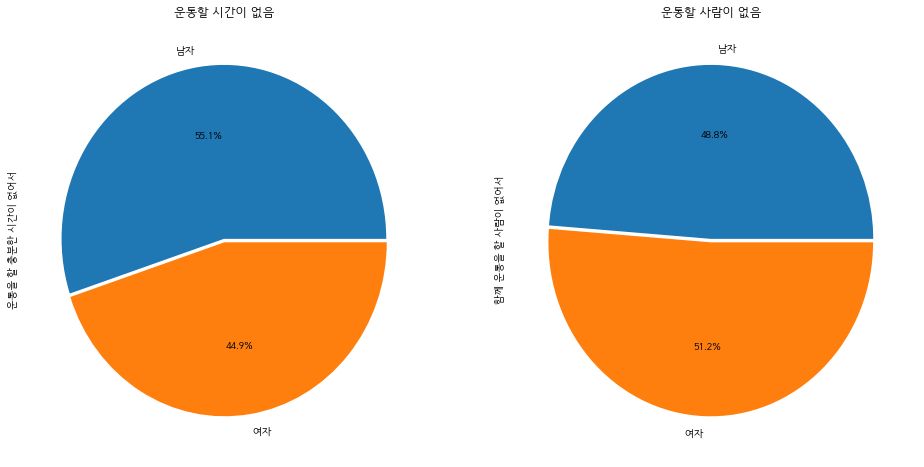

In [88]:
# plot(행,열,그래프사이즈)
f, ax = plt.subplots(1, 2, figsize = (16,8))
#pit() = 파이차트를 그려라
# 첫번째 축에 들어갈 파이차트를 소수점첫째짜리까리 데이터를 적용해서 그려라
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0, 0.02], ax = ax[0], autopct='%1.1f%%')
not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0, 0.02], ax = ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
ax[1].set_title('운동할 사람이 없음')
plt.show()